##EDA on Reddit Survey Data

In [1]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
sns.set(style="whitegrid", color_codes=True)

In [3]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 500

In [4]:
df = pd.read_csv('/Users/shannon/Documents/CSC570/gitRepo/bernico/CS570/RedditShortDemoSurvey-1-Cleaned.csv')

In [5]:
df.head()

,Entry Id,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Treated country data,(For U. S. redditors) In which state do you live?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,1,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",getmotivated,none,none,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Male,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,New York,"$150,000 or more",gaming,none,none,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Female,18-24,Blank,Freelance,none,No,Some college,United States,Virginia,"Under $20,000",snackexchange,none,none,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Male,25-34,Blank,Freelance,none,No,Bachelor's degree,United States,New York,"$150,000 or more",spacedicks,none,none,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Female,25-34,Blank,Employed full time,none,No,Bachelor's degree,United States,California,"$70,000 - $99,999",aww,none,none,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,Entry Id
count,32754.000000
mean,16378.561916
std,9456.272427
min,1.000000
25%,8189.250000
50%,16379.500000
75%,24567.750000
max,32756.000000


####Borrowing describle categorical function from titanic lecture

In [7]:
# Here is a simple function to show descriptive stats on the categorical variables
def describe_categorical(X):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

In [8]:
df.shape

(32754, 20)

####Aggregate Countries to Continents

https://www.newworldencyclopedia.org/entry/List_of_countries_by_continent

Assuming Georgia is in North America

In [9]:
df['Treated country data'] = df['Treated country data'].str.lower()

In [10]:
continents = pd.Series(['africa', 'antarctica', 'asia', 'australia', 
                        'europe', 'north_america', 'south_america'])

In [11]:
#List of countries in Africa
africa = pd.Series(['Algeria', 'Angola', 'Benin', 'Botswana', 
                    'Burkina Faso', 'Burundi', 'Cabo Verde', 
                    'Cameroon', 'Central African Republic', 'Chad', 
                    'Comoros' 'Congo',  'Cote d\'Ivoire', 'Djibouti',
                    'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 
                    'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 
                    'Kenya', 'Lesotho', 'Liberia', 'Libya', 'Madagascar',
                    'Malawi', 'Mali', 'Mauritania', 'Mauritius', 
                    'Morocco', 'Mozambique', 'Namibia', 'Niger', 
                    'Nigeria', 'Rwanda', 'Sao Tome and Principe', 
                    'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 
                    'South Africa', 'South Sudan', 'Sudan', 'Swaziland', 
                    'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 
                    'Zimbabwe', 'africa'])

In [12]:
africa = africa.str.lower()

In [13]:
#List of countries in Antarctica
antarctica = pd.Series(['Bouvet Island', 'French Southern Territories', 
                        'Heard Island', 'McDonald Islands', 
                        'South Sandwich Islands', 'antarctica'])

In [14]:
antarctica = antarctica.str.lower()

In [15]:
#List of countries in Asia
asia = pd.Series(['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 
                  'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'Cyprus',
                  'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 
                  'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
                  'Kyrgyzstan', 'Laos', 'Lebanon', 'Macau', 
                  'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 
                  'Nepal', 'Oman', 'Pakistan', 'Philippines', 'Qatar', 
                  'Singapore', 'Syria', 'Tajikistan', 'Thailand',
                  'Turkey', 'Turkmenistan', 'Uzbekistan', 'Vietnam', 
                  'Yemen', 'Burma', ' British Indian', 'China', 'Cocos', 
                  'Keeling', 'Korea', 'Palestine', 'Palestinian', 
                  'United Arab Emirates', 'UAE', 'Christmas Island',
                  'Hong Kong', 'Saudi Arabia', 'Sri Lanka', 'Timor', 
                  'taiwan', 'hong', 'united arab', 'asia'])

In [16]:
asia = asia.str.lower()

In [17]:
#List of countries in Australia
australia = pd.Series(['Australia', 'Fiji', 'Kiribati', 
                       'Marshall Islands', 'Micronesia', 'Nauru', 
                       'New Zealand', 'Palau', 'Papua New Guinea', 
                       'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 
                       'Vanuatu', 'American Samoa', 'Cook Islands', 
                       'French Polynesia', 'Guam', 'New Caledonia', 'Niue', 
                       'Norfolk Island', 'Northern Mariana Islands',
                       'Pitcairn Islands', 'Tokelau', 'Wallis ', 'Futuna', 
                       'austrailia', 'australia'])

In [18]:
australia = australia.str.lower()

In [19]:
#List of countries in Europe
europe = pd.Series(['Albania', 'Andorra', 'Austria', 'Belarus', 
                    'Belgium', 'Bulgaria', 'Croatia', 'Denmark', 
                    'Estonia', 'Finland', 'France', 'Germany', 'Greece', 
                    'Hungary', 'Iceland', 'Italy', 'Kosovo', 'Latvia', 
                    'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 
                    'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 
                    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 
                    'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 
                    'Switzerland', 'Ukraine', 'Czech Republic', 'Ireland',
                    'San Marino', 'United Kingdom', 'UK', 'U. K.', 
                    'England', 'Bosnia', 'Herzegovina', 'Faroe', 
                    'Gibraltar', 'Guernsey', 'Isle of Man', 'Jersey', 
                    'Macedonia', 'Vatican City', 'Scotland', 'Wales', 
                    'united kin', 'yorkshire', 'holland', 'swiss',
                    'swed', 'u.k', 'uninted kingdom', 'united jingdom', 
                    'swden', 'frabce', 'europe', 'kingdom'])

In [20]:
europe = europe.str.lower()

In [21]:
#List of countries in North America
north_america = pd.Series(['Anguilla', 'Aruba', 'Barbados', 
                           'Belize', 'Bermuda', 'Canada', 'Costa', 
                           'Cuba', 'Dominica', 'Greenland', 'Grenada', 
                           'Guadeloupe', 'Guatemala', 'Haiti', 'Honduras',
                           'Jamaica', 'Martinique', 'Mexico', 'Montserrat',
                           'Nicaragua', 'Panama', 'Saint Luca',
                           'Clipperton', 'El Salvador', 'Antilles', 
                           'Saint Barthelemy', 'Saint Pierre', 
                           'Trinidad', 'Tobago', 'United States', 
                           'USA', 'U.S.A', 'Antigua',
                           'Barbuda', 'Bahamas', 'British Virgin Islands',
                           'Cayman', 'Dominican Republic', 'Navassa', 
                           'Puerto Rico', 'Saint Kitts', 'Nevis', 
                           'Saint Martin', 'St Martin', 'Saint Vincent', 
                           'Grenadines', 'St Vincent', 'Turks', 'Caicos', 
                           'Virgin Islands', 'united sates', 'méxico', 
                           'cananda', 'canadia', 'california', 'united st', 
                           'toronto'])

In [22]:
north_america = north_america.str.lower()

In [23]:
#List of countries in South America
south_america = pd.Series(['Argentina', 'Bolivia', 'Brazil', 'Chile', 
                           'Colombia', 'Ecuador', 'Guyana', 'Paraguay',
                           'Peru', 'Suriname', 'Uruguay', 'Venezuela', 
                           'Falkland Islands', 'French Guiana', 'brasil'])

In [24]:
south_america = south_america.str.lower()

In [25]:
df['africa'] = 0

In [26]:
#Setting to 1 if value in treated country data is in country list
for country in africa:
    df['africa'][df['Treated country data'].str.contains(country) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [27]:
df['antarctica'] = 0

In [28]:
#Setting to 1 if value in treated country data is in country list
for country in antarctica:
    df['antarctica'][df['Treated country data'].str.contains(country) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [29]:
df['asia'] = 0

In [30]:
#Setting to 1 if value in treated country data is in country list
for country in asia:
    df['asia'][df['Treated country data'].str.contains(country) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [31]:
df['australia'] = 0

In [32]:
#Setting to 1 if value in treated country data is in country list
for country in australia:
    df['australia'][df['Treated country data'].str.contains(country) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [33]:
df['europe'] = 0

In [34]:
#Setting to 1 if value in treated country data is in country list
for country in europe:
    df['europe'][df['Treated country data'].str.contains(country) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [35]:
df['north_america'] = 0

In [36]:
#Setting to 1 if value in treated country data is in country list
for country in north_america:
    df['north_america'][df['Treated country data'].str.contains(country) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [37]:
df['south_america'] = 0

In [38]:
#Setting to 1 if value in treated country data is in country list
for country in south_america:
    df['south_america'][df['Treated country data'].str.contains(country) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [39]:
#verify there aren't nulls in these new columns
df.describe()

,Entry Id,africa,antarctica,asia,australia,europe,north_america,south_america
count,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000,32754.000000
mean,16378.561916,0.003694,0.000061,0.028088,0.043445,0.168254,0.744337,0.008579
std,9456.272427,0.060669,0.007814,0.165227,0.203860,0.374098,0.436240,0.092227
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8189.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,16379.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,24567.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,32756.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df['north_america'][df['(For U. S. redditors) In which state do you live?'].notnull() == True].value_counts()

1    20846
dtype: int64

In [41]:
#See how many typos/unique values are remaining
df['Treated country data'][(df.africa == 0) & (df.antarctica == 0) & (df.asia == 0) & 
                          (df.australia == 0) &  (df.europe == 0) & 
                          (df.north_america == 0) & (df.south_america == 0) & 
                          (df['Treated country data'] != 'none')].count()

74

I'm okay with this number for now

##### Add a column for United States

In [42]:
df['united_states'] = 0

In [43]:
df['united_states'][df['(For U. S. redditors) In which state do you live?'].notnull() == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


#####Add a column for countries with mandatory military service
https://en.wikipedia.org/wiki/Military_service

In [44]:
mandatory_military_countries = pd.Series(['Benin', 'Cape Verde', 'Central African Republic', 
                                          'Chad', 'Equatorial Guinea', 'Guinea-Bissau', 'Mali',
                                          'Mexico', 'Niger', 'Senegal', 'Taiwan', 'Togo', 
                                          'Vietnam', 'Angola', 'Algeria', 'Austria', 'Belarus', 
                                          'Cyprus', 'Denmark', 'Estonia', 'Finland', 'Greece', 
                                          'Iran', 'Mexico', 'Norway', 'Paraguay', 'Russia',
                                          'Switzerland', 'Israel', 'Austria', 'Bolivia',
                                          'Brazil', 'Cape Verde', 'Colombia', 'Denmark', 
                                          'Estonia', 'Ecuador', 'Finland', 'Greece', 'Guatemala',
                                          'Lithuania', 'Moldova', 'Mongolia', 'Paraguay', 'Qatar',
                                          'Russia', 'Taiwan', 'Tunisia', 'Turkey', 'Uzbekistan',
                                          'UAE', 'Algeria', 'Azerbaijan', 'Benin', 'Cambodia', 
                                          'Côte', 'Cote' 'Egypt', 'Georgia', 'Kuwait', 'Laos', 
                                          'Norway', 'Armenia', 'Angola', 'Central', 'Chad', 'Cuba',
                                          'Cyprus', 'Eritrea', 'Equatorial', 'Guinea', 'Iran', 
                                          'Israel', 'Kazakhstan', 'Korea', 'Kyrgyzstan', 'Libya',
                                          'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Niger', 
                                          'Senegal', 'Singapore', 'Somalia', 'Syria', 'Sudan',
                                          'Tajikistan', 'Thailand', 'Turkmenistan', 'Togo', 'UAE',
                                          'Vietnam', 'Yemen', 'Emirates'])

In [45]:
mandatory_military_countries = mandatory_military_countries.str.lower()

In [46]:
df['mandatory_military'] = 0

In [47]:
#Setting to 1 if value in treated country data is in country list
for country in mandatory_military_countries:
    df['mandatory_military'][df['Treated country data'].str.contains(country) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [48]:
df['mandatory_military'].value_counts()

0    31169
1     1585
dtype: int64

####Drop US States

In [49]:
df = df.drop(['(For U. S. redditors) In which state do you live?', 'Treated country data'], axis=1)

####Handle missing values

In [50]:
df.shape

(32754, 27)

In [51]:
describe_categorical(df)

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
count,32754,32754,32754,32754,32754,32754,32754,32754,28419,32752,32754,3,3,1,1,1,1
unique,3,8,7,7,3,3,8,9,1833,7,17,3,2,1,1,1,1
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,"Under $20,000",askreddit,I like dogs.,Other,7/13/11 15:47,public,I like cats.,Other,7/14/11 13:22,public
freq,26418,15802,10428,14814,30526,27488,11046,7892,2123,17149,6562,1,2,1,1,1,1


####Variables with missing values
* treated subreddit data
* Are you a dog or a cat person?
* Unnamed 12-19 - drop these

In [52]:
#Filling nulls in subreddit data with none
df['treated subreddit data'].fillna('none', inplace=True)

In [53]:
#Filling nulls in dog/cat data with none
df['Are you a dog or a cat person?'].fillna('none', inplace=True)

In [54]:
df = df.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 
             'Unnamed: 18', 'Unnamed: 19', ], axis=1)

In [55]:
describe_categorical(df)

,Please indicate your gender.,Please select the category that includes your age.,What is your marital status?,What best describes your employment status?,Are you or have you ever been in military service?,Do you currently have children under the age of 18 living in your household?,What best describes your level of education?,Which one of the following ranges includes your total yearly household income before taxes?,treated subreddit data,Are you a dog or a cat person?,"If you were a cheese, what cheese would you be?"
count,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754,32754
unique,3,8,7,7,3,3,8,9,1833,7,17
top,Male,18-24,Single,Employed full time,No,No,Bachelor's degree,"Under $20,000",none,I like dogs.,Other
freq,26418,15802,10428,14814,30526,27488,11046,7892,4361,17149,6562


####Clean bad data
Are you a dog or a cat person?
 * none                   7
 * askreddit              2
 * Reddit.com             1
 * movies                 1
 
If you were a cheese, what cheese would you be?
 * f7u12               2
 * 1                   1
 * programming')       1
 * awww                1
 * Pics                1

In [56]:
for x in df.columns:
    print x
    print df[x].value_counts()
    print '\n'

Entry Id
2047     1
15693    1
21824    1
23873    1
17730    1
19779    1
30020    1
32069    1
25926    1
27975    1
5448     1
7497     1
1354     1
3403     1
13644    1
9550     1
9518     1
11599    1
21856    1
23905    1
17762    1
19811    1
30052    1
32101    1
25958    1
28007    1
5480     1
7529     1
1386     1
3435     1
11567    1
15661    1
15725    1
15629    1
21760    1
23809    1
17666    1
19715    1
29956    1
32005    1
25862    1
27911    1
5384     1
7433     1
1290     1
3339     1
13580    1
9486     1
13612    1
11535    1
        ..
31450    1
29403    1
19164    1
23262    1
10896    1
21215    1
10992    1
8945     1
15090    1
13043    1
2804     1
757      1
6902     1
4855     1
27384    1
25337    1
31482    1
29435    1
21183    1
23230    1
17085    1
19132    1
8849     1
14994    1
12947    1
2708     1
661      1
6806     1
4759     1
27288    1
25241    1
31386    1
29339    1
19100    1
17053    1
23198    1
21151    1
10928    1
8881     1
1

In [57]:
#changing bad data to none 
df['Are you a dog or a cat person?'][df['Are you a dog or a cat person?'] == 'askreddit'] = 'none'

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [58]:
#changing bad data to none 
df['Are you a dog or a cat person?'][df['Are you a dog or a cat person?'] == ' Reddit.com'] = 'none'

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [59]:
#changing bad data to none 
df['Are you a dog or a cat person?'][df['Are you a dog or a cat person?'] == 'movies'] = 'none'

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [60]:
df['Are you a dog or a cat person?'].value_counts()

I like dogs.       17149
I like cats.       11152
I like turtles.     4442
none                  11
dtype: int64

In [61]:
#changing bad data to none 
df['If you were a cheese, what cheese would you be?'][df['If you were a cheese, what cheese would you be?'] == ' f7u12'] = 'none'

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [62]:
#changing bad data to none 
df['If you were a cheese, what cheese would you be?'][df['If you were a cheese, what cheese would you be?'] == '1'] = 'none'

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [63]:
#changing bad data to none 
df['If you were a cheese, what cheese would you be?'][df['If you were a cheese, what cheese would you be?'] == "programming')"] = 'none'

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [64]:
#changing bad data to none 
df['If you were a cheese, what cheese would you be?'][df['If you were a cheese, what cheese would you be?'] == ' awww'] = 'none'

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [65]:
#changing bad data to none 
df['If you were a cheese, what cheese would you be?'][df['If you were a cheese, what cheese would you be?'] == ' Pics'] = 'none'

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [66]:
df['If you were a cheese, what cheese would you be?'].value_counts()

Other        6562
Cheddar      6101
Brie         3742
Provolone    3454
Swiss        3214
Feta         2991
Goat         2516
Munster      1770
American     1438
Paneer        618
Limburger     337
none           11
dtype: int64

#####Create column for any college at all

In [67]:
df['What best describes your level of education?'].value_counts()

Bachelor's degree                     11046
Some college                           9600
Graduate or professional degree        4722
High school graduate or equivalent     3272
Some high school                       1924
Associate degree                       1411
Trade or Vocational degree              635
None                                    144
dtype: int64

In [68]:
any_college = pd.Series(["Bachelor's degree", "Some college", "Graduate or professional degree",
           "Associate degree"])

In [69]:
df['college'] = 0

In [70]:
#Setting to 1 if value in college data is in college list
for college in any_college:
    df['college'][df['What best describes your level of education?'].str.contains(college) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [72]:
df.college.value_counts()

1    26779
0     5975
dtype: int64

####Create indicator variables for categoricals

In [73]:
categorical_variables = df.columns[df.dtypes == "object"]

In [74]:
categorical_variables = categorical_variables.drop('treated subreddit data')

In [75]:
categorical_variables

Index([u'Please indicate your gender.',
       u'Please select the category that includes your age.',
       u'What is your marital status?',
       u'What best describes your employment status?',
       u'Are you or have you ever been in military service?',
       u'Do you currently have children under the age of 18 living in your household?',
       u'What best describes your level of education?',
       u'Which one of the following ranges includes your total yearly household income before taxes?',
       u'Are you a dog or a cat person?',
       u'If you were a cheese, what cheese would you be?'],
      dtype='object')

In [76]:
for variable in categorical_variables:
    # Create array of dummies
    dummies = pd.get_dummies(df[variable], prefix=variable)
    # Update df to include dummies and drop the main variable
    df = pd.concat([df, dummies], axis=1)
    df.drop([variable], axis=1, inplace=True)

In [77]:
df.head()

,Entry Id,treated subreddit data,africa,antarctica,asia,australia,europe,north_america,south_america,united_states,mandatory_military,college,Please indicate your gender._Female,Please indicate your gender._Male,Please indicate your gender._None,Please select the category that includes your age._18-24,Please select the category that includes your age._25-34,Please select the category that includes your age._35-44,Please select the category that includes your age._45-54,Please select the category that includes your age._55-64,Please select the category that includes your age._65 or Above,Please select the category that includes your age._None,Please select the category that includes your age._Under 18,What is your marital status?_Blank,What is your marital status?_Engaged,What is your marital status?_Forever Alone,What is your marital status?_In a relationship,What is your marital status?_Married/civil union/domestic partnership,What is your marital status?_Single,What is your marital status?_Widowed,What best describes your employment status?_Employed full time,What best describes your employment status?_Freelance,What best describes your employment status?_None,What best describes your employment status?_Not employed and not looking for work,"What best describes your employment status?_Not employed, but looking for work",What best describes your employment status?_Retired,What best describes your employment status?_Student,Are you or have you ever been in military service?_No,Are you or have you ever been in military service?_Yes,Are you or have you ever been in military service?_none,Do you currently have children under the age of 18 living in your household?_No,Do you currently have children under the age of 18 living in your household?_None,Do you currently have children under the age of 18 living in your household?_Yes,What best describes your level of education?_Associate degree,What best describes your level of education?_Bachelor's degree,What best describes your level of education?_Graduate or professional degree,What best describes your level of education?_High school graduate or equivalent,What best describes your level of education?_None,What best describes your level of education?_Some college,What best describes your level of education?_Some high school,What best describes your level of education?_Trade or Vocational degree,"Which one of the following ranges includes your total yearly household income before taxes?_$100,000 - $149,999","Which one of the following ranges includes your total yearly household income before taxes?_$150,000 or more","Which one of the following ranges includes your total yearly household income before taxes?_$20,000 - $29,999","Which one of the following ranges includes your total yearly household income before taxes?_$30,000 - $39,999","Which one of the following ranges includes your total yearly household income before taxes?_$40,000 - $49,999","Which one of the following ranges includes your total yearly household income before taxes?_$50,000 - $69,999","Which one of the following ranges includes your total yearly household income before taxes?_$70,000 - $99,999","Which one of the following ranges includes your total yearly household income before taxes?_Under $20,000",Which one of the following ranges includes your total yearly household income before taxes?_none,Are you a dog or a cat person?_I like cats.,Are you a dog or a cat person?_I like dogs.,Are you a dog or a cat person?_I like turtles.,Are you a dog or a cat person?_none,"If you were a cheese, what cheese would you be?_American","If you were a cheese, what cheese would you be?_Brie","If you were a cheese, what cheese would you be?_Cheddar","If you were a cheese, what cheese would you be?_Feta","If you were a cheese, what cheese would you be?_Goat","If you were a cheese, what cheese would you be?_Limburger","If you were a cheese, what cheese would you be?_Munster","If you were a cheese, what cheese would you be?_Other","If

In [78]:
df.describe()

,Entry Id,africa,antarctica,asia,australia,europe,north_america,south_america,united_states,mandatory_military,college,Please indicate your gender._Female,Please indicate your gender._Male,Please indicate your gender._None,Please select the category that includes your age._18-24,Please select the category that includes your age._25-34,Please select the category that includes your age._35-44,Please select the category that includes your age._45-54,Please select the category that includes your age._55-64,Please select the category that includes your age._65 or Above,Please select the category that includes your age._None,Please select the category that includes your age._Under 18,What is your marital status?_Blank,What is your marital status?_Engaged,What is your marital status?_Forever Alone,What is your marital status?_In a relationship,What is your marital status?_Married/civil union/domestic partnership,What is your marital status?_Single,What is your marital status?_Widowed,What best describes your employment status?_Employed full time,What best describes your employment status?_Freelance,What best describes your employment status?_None,What best describes your employment status?_Not employed and not looking for work,"What best describes your employment status?_Not employed, but looking for work",What best describes your employment status?_Retired,What best describes your employment status?_Student,Are you or have you ever been in military service?_No,Are you or have you ever been in military service?_Yes,Are you or have you ever been in military service?_none,Do you currently have children under the age of 18 living in your household?_No,Do you currently have children under the age of 18 living in your household?_None,Do you currently have children under the age of 18 living in your household?_Yes,What best describes your level of education?_Associate degree,What best describes your level of education?_Bachelor's degree,What best describes your level of education?_Graduate or professional degree,What best describes your level of education?_High school graduate or equivalent,What best describes your level of education?_None,What best describes your level of education?_Some college,What best describes your level of education?_Some high school,What best describes your level of education?_Trade or Vocational degree,"Which one of the following ranges includes your total yearly household income before taxes?_$100,000 - $149,999","Which one of the following ranges includes your total yearly household income before taxes?_$150,000 or more","Which one of the following ranges includes your total yearly household income before taxes?_$20,000 - $29,999","Which one of the following ranges includes your total yearly household income before taxes?_$30,000 - $39,999","Which one of the following ranges includes your total yearly household income before taxes?_$40,000 - $49,999","Which one of the following ranges includes your total yearly household income before taxes?_$50,000 - $69,999","Which one of the following ranges includes your total yearly household income before taxes?_$70,000 - $99,999","Which one of the following ranges includes your total yearly household income before taxes?_Under $20,000",Which one of the following ranges includes your total yearly household income before taxes?_none,Are you a dog or a cat person?_I like cats.,Are you a dog or a cat person?_I like dogs.,Are you a dog or a cat person?_I like turtles.,Are you a dog or a cat person?_none,"If you were a cheese, what cheese would you be?_American","If you were a cheese, what cheese would you be?_Brie","If you were a cheese, what cheese would you be?_Cheddar","If you were a cheese, what cheese would you be?_Feta","If you were a cheese, what cheese would you be?_Goat","If you were a cheese, what cheese would you be?_Limburger","If you were a cheese, what cheese would you be?_Munster","If you were a cheese, what cheese would you be?_Other","If you were a cheese, wha

Handle categorical for treated subreddit data


df.drop('treated subreddit data', axis=1, inplace=True)

In [79]:
df['subreddit_count'] = df.groupby(['treated subreddit data'])['Entry Id'].transform('count')

In [80]:
test = df[['treated subreddit data', 'subreddit_count']][ df['subreddit_count'] > 100]

In [81]:
categorical_reddit = test['treated subreddit data'].unique()

In [82]:
categorical_reddit

array(['gaming', 'aww', 'fffffffuuuuuuuuuuuu', 'todayilearned', 'none',
       'starcraft', 'technology', 'askreddit', 'twoxchromosomes',
       'askscience', 'android', 'truereddit', 'atheism', 'new',
       'programming', 'pics', 'politics', 'soccer', 'iama',
       'firstworldproblems', 'tf2', 'minecraft', 'fitness', 'funny',
       'trees', 'all', 'videos', 'gonewild', 'earthporn', 'worldnews',
       'f7u12', 'loseit', 'wtf', 'frontpage', 'reddit.com', 'nosleep',
       'science', 'sex', 'nsfw', 'circlejerk', 'doctorwho', 'ama', 'guns'], dtype=object)

In [83]:
categorical_reddit = (['gaming', 'aww', 'fffffffuuuuuuuuuuuu', 'todayilearned', 'none',
       'starcraft', 'technology', 'askreddit', 'twoxchromosomes',
       'askscience', 'android', 'truereddit', 'atheism', 'new',
       'programming', 'pics', 'politics', 'soccer', 'iama',
       'firstworldproblems', 'tf2', 'minecraft', 'fitness', 'funny',
       'trees', 'all', 'videos', 'gonewild', 'earthporn', 'worldnews',
       'f7u12', 'loseit', 'wtf', 'frontpage', 'reddit.com', 'nosleep',
       'science', 'sex', 'nsfw', 'circlejerk', 'doctorwho', 'ama', 'guns', 'military'])

In [84]:
categorical_reddit

['gaming',
 'aww',
 'fffffffuuuuuuuuuuuu',
 'todayilearned',
 'none',
 'starcraft',
 'technology',
 'askreddit',
 'twoxchromosomes',
 'askscience',
 'android',
 'truereddit',
 'atheism',
 'new',
 'programming',
 'pics',
 'politics',
 'soccer',
 'iama',
 'firstworldproblems',
 'tf2',
 'minecraft',
 'fitness',
 'funny',
 'trees',
 'all',
 'videos',
 'gonewild',
 'earthporn',
 'worldnews',
 'f7u12',
 'loseit',
 'wtf',
 'frontpage',
 'reddit.com',
 'nosleep',
 'science',
 'sex',
 'nsfw',
 'circlejerk',
 'doctorwho',
 'ama',
 'guns',
 'military']

In [85]:
for variable in categorical_reddit:
    #Create columns for top 100 categories, assign 1 if the treated data contains this category
    df[variable] = 0
    df[variable][df['treated subreddit data'].str.contains(variable) == True] = 1

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [86]:
df = df.drop(['treated subreddit data'], axis=1)

####Visualize data

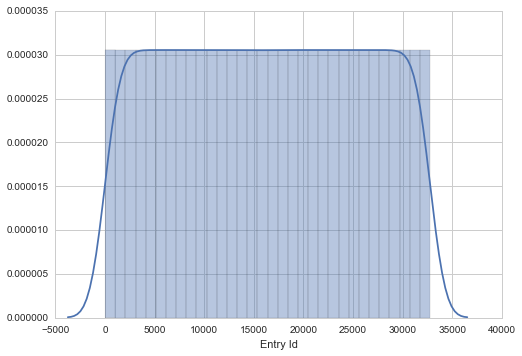

In [87]:
sns.distplot(df['Entry Id'])

In [88]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


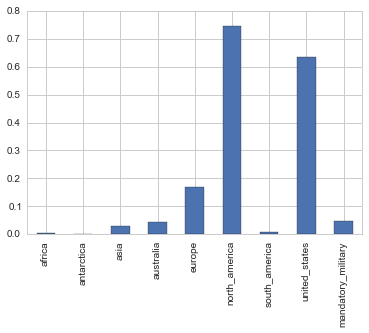

In [89]:
df[['africa', 'antarctica', 'asia', 'australia', 'europe', 'north_america', 'south_america', 'united_states', 'mandatory_military']].mean().plot(kind='bar')

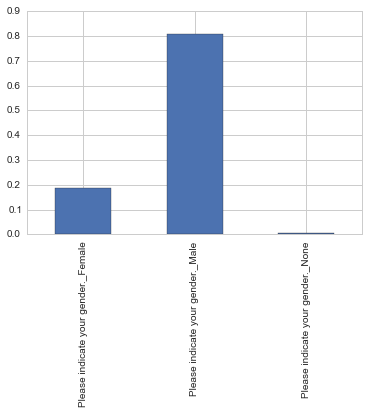

In [90]:
df[['Please indicate your gender._Female', 'Please indicate your gender._Male', 'Please indicate your gender._None']].mean().plot(kind='bar')

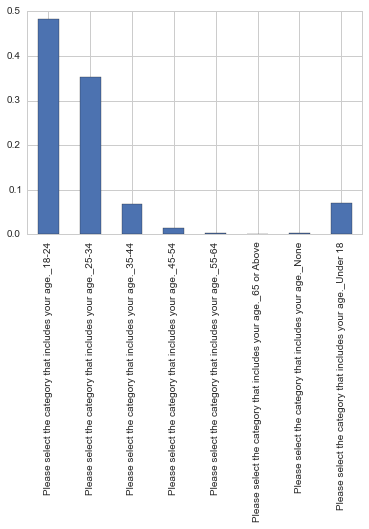

In [91]:
df[['Please select the category that includes your age._18-24', 'Please select the category that includes your age._25-34', 'Please select the category that includes your age._35-44', 'Please select the category that includes your age._45-54', 'Please select the category that includes your age._55-64', 'Please select the category that includes your age._65 or Above', 'Please select the category that includes your age._None', 'Please select the category that includes your age._Under 18']].mean().plot(kind='bar')

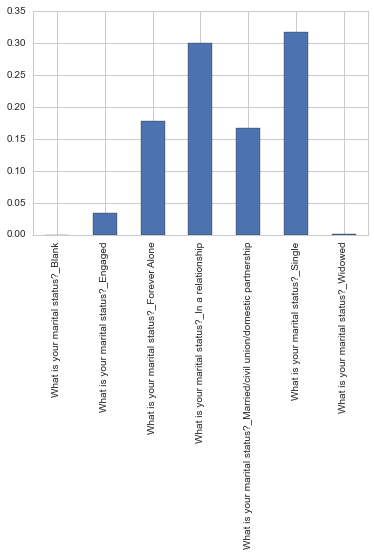

In [92]:
df[['What is your marital status?_Blank', 'What is your marital status?_Engaged', 'What is your marital status?_Forever Alone', 'What is your marital status?_In a relationship', 'What is your marital status?_Married/civil union/domestic partnership', 'What is your marital status?_Single', 'What is your marital status?_Widowed']].mean().plot(kind='bar')

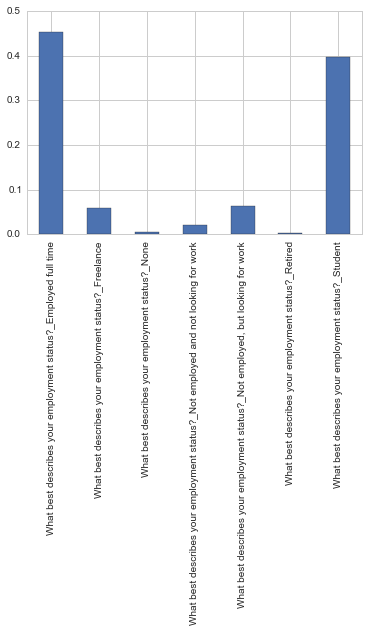

In [93]:
df[['What best describes your employment status?_Employed full time', 'What best describes your employment status?_Freelance', 'What best describes your employment status?_None', 'What best describes your employment status?_Not employed and not looking for work', 'What best describes your employment status?_Not employed, but looking for work', 'What best describes your employment status?_Retired', 'What best describes your employment status?_Student']].mean().plot(kind='bar')

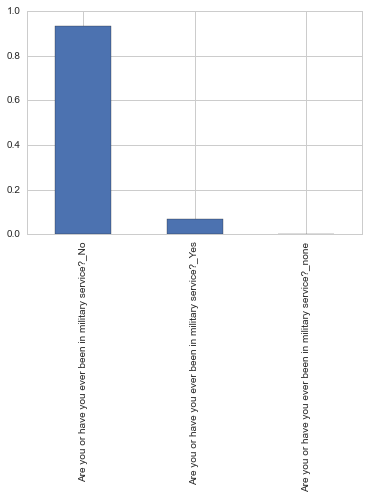

In [94]:
df[['Are you or have you ever been in military service?_No', 'Are you or have you ever been in military service?_Yes', 'Are you or have you ever been in military service?_none']].mean().plot(kind='bar')

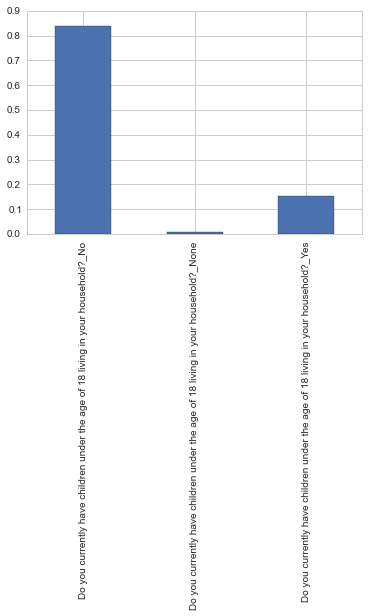

In [95]:
df[['Do you currently have children under the age of 18 living in your household?_No', 'Do you currently have children under the age of 18 living in your household?_None', 'Do you currently have children under the age of 18 living in your household?_Yes']].mean().plot(kind='bar')

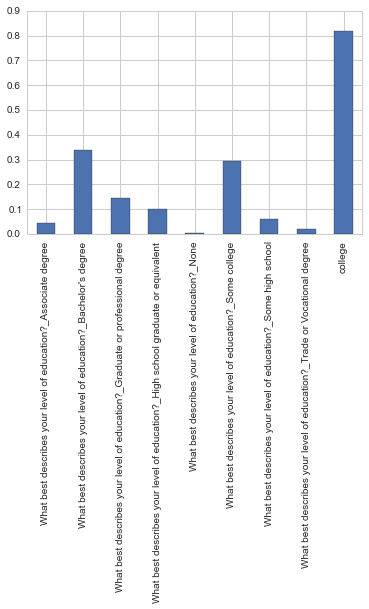

In [96]:
df[["What best describes your level of education?_Associate degree", "What best describes your level of education?_Bachelor's degree", "What best describes your level of education?_Graduate or professional degree", "What best describes your level of education?_High school graduate or equivalent", "What best describes your level of education?_None", "What best describes your level of education?_Some college", "What best describes your level of education?_Some high school", "What best describes your level of education?_Trade or Vocational degree", "college"]].mean().plot(kind='bar')

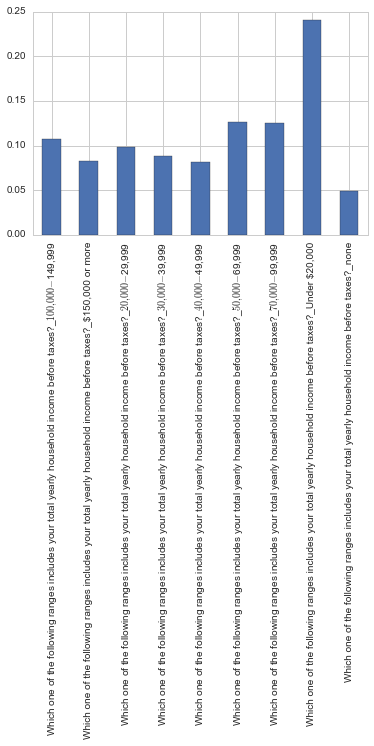

In [97]:
df[[u'Which one of the following ranges includes your total yearly household income before taxes?_$100,000 - $149,999',
       u'Which one of the following ranges includes your total yearly household income before taxes?_$150,000 or more',
       u'Which one of the following ranges includes your total yearly household income before taxes?_$20,000 - $29,999',
       u'Which one of the following ranges includes your total yearly household income before taxes?_$30,000 - $39,999',
       u'Which one of the following ranges includes your total yearly household income before taxes?_$40,000 - $49,999',
       u'Which one of the following ranges includes your total yearly household income before taxes?_$50,000 - $69,999',
       u'Which one of the following ranges includes your total yearly household income before taxes?_$70,000 - $99,999',
       u'Which one of the following ranges includes your total yearly household income before taxes?_Under $20,000',
       u'Which one of the following ranges includes your total yearly household income before taxes?_none']].mean().plot(kind='bar')

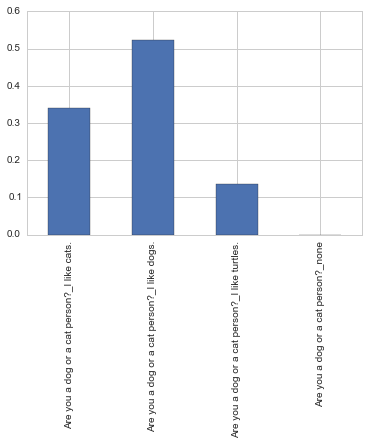

In [98]:
df[['Are you a dog or a cat person?_I like cats.', 'Are you a dog or a cat person?_I like dogs.', 'Are you a dog or a cat person?_I like turtles.', 'Are you a dog or a cat person?_none']].mean().plot(kind='bar')

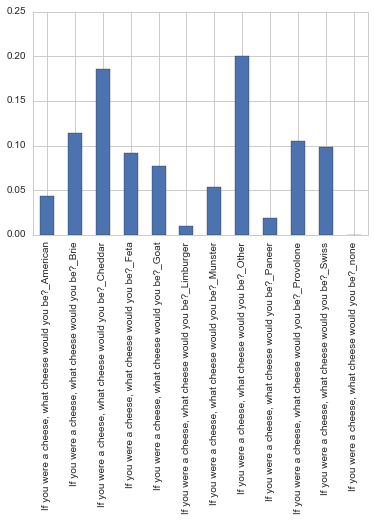

In [99]:
df[['If you were a cheese, what cheese would you be?_American', 'If you were a cheese, what cheese would you be?_Brie', 'If you were a cheese, what cheese would you be?_Cheddar', 'If you were a cheese, what cheese would you be?_Feta', 'If you were a cheese, what cheese would you be?_Goat', 'If you were a cheese, what cheese would you be?_Limburger', 'If you were a cheese, what cheese would you be?_Munster', 'If you were a cheese, what cheese would you be?_Other', 'If you were a cheese, what cheese would you be?_Paneer', 'If you were a cheese, what cheese would you be?_Provolone', 'If you were a cheese, what cheese would you be?_Swiss', 'If you were a cheese, what cheese would you be?_none']].mean().plot(kind='bar')

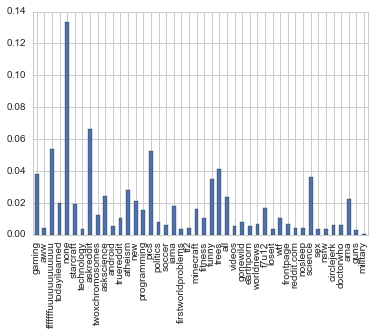

In [100]:
df[['gaming', 'aww', 'fffffffuuuuuuuuuuuu', 'todayilearned', 'none', 'starcraft', 'technology', 'askreddit', 'twoxchromosomes', 'askscience', 'android', 'truereddit', 'atheism', 'new', 'programming', 'pics', 'politics', 'soccer', 'iama', 'firstworldproblems', 'tf2', 'minecraft', 'fitness', 'funny', 'trees', 'all', 'videos', 'gonewild', 'earthporn', 'worldnews', 'f7u12', 'loseit', 'wtf', 'frontpage', 'reddit.com', 'nosleep', 'science', 'sex', 'nsfw', 'circlejerk', 'doctorwho', 'ama', 'guns', 'military']].mean().plot(kind='bar')

####Use Pearson's Correlation Coefficient, determine which variables are most highly collinear, and graph the results.

http://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html

In [101]:
df.shape

(32754, 120)

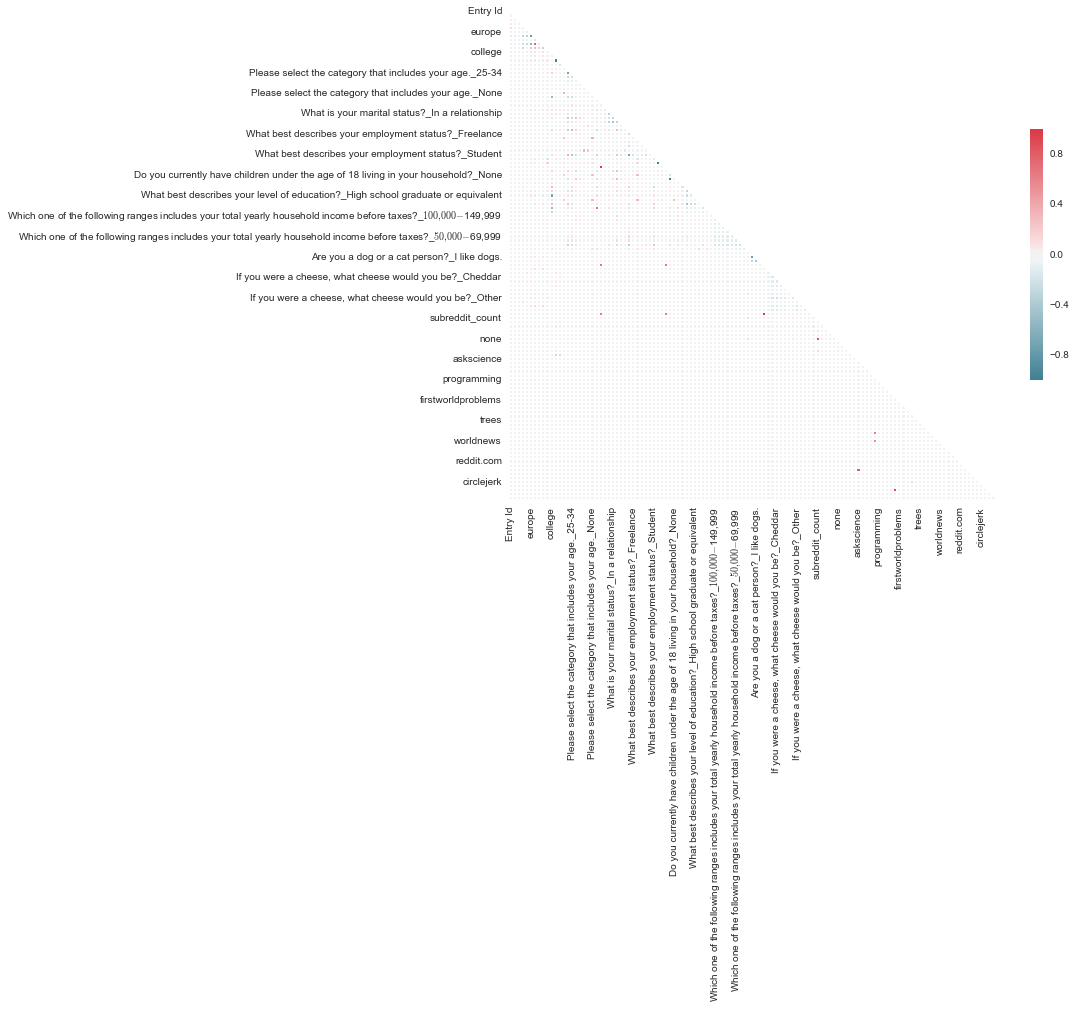

In [102]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

###Random forest to predict military service

In [103]:
df.head()

,Entry Id,africa,antarctica,asia,australia,europe,north_america,south_america,united_states,mandatory_military,college,Please indicate your gender._Female,Please indicate your gender._Male,Please indicate your gender._None,Please select the category that includes your age._18-24,Please select the category that includes your age._25-34,Please select the category that includes your age._35-44,Please select the category that includes your age._45-54,Please select the category that includes your age._55-64,Please select the category that includes your age._65 or Above,Please select the category that includes your age._None,Please select the category that includes your age._Under 18,What is your marital status?_Blank,What is your marital status?_Engaged,What is your marital status?_Forever Alone,What is your marital status?_In a relationship,What is your marital status?_Married/civil union/domestic partnership,What is your marital status?_Single,What is your marital status?_Widowed,What best describes your employment status?_Employed full time,What best describes your employment status?_Freelance,What best describes your employment status?_None,What best describes your employment status?_Not employed and not looking for work,"What best describes your employment status?_Not employed, but looking for work",What best describes your employment status?_Retired,What best describes your employment status?_Student,Are you or have you ever been in military service?_No,Are you or have you ever been in military service?_Yes,Are you or have you ever been in military service?_none,Do you currently have children under the age of 18 living in your household?_No,Do you currently have children under the age of 18 living in your household?_None,Do you currently have children under the age of 18 living in your household?_Yes,What best describes your level of education?_Associate degree,What best describes your level of education?_Bachelor's degree,What best describes your level of education?_Graduate or professional degree,What best describes your level of education?_High school graduate or equivalent,What best describes your level of education?_None,What best describes your level of education?_Some college,What best describes your level of education?_Some high school,What best describes your level of education?_Trade or Vocational degree,...,"If you were a cheese, what cheese would you be?_Other","If you were a cheese, what cheese would you be?_Paneer","If you were a cheese, what cheese would you be?_Provolone","If you were a cheese, what cheese would you be?_Swiss","If you were a cheese, what cheese would you be?_none",subreddit_count,gaming,aww,fffffffuuuuuuuuuuuu,todayilearned,none,starcraft,technology,askreddit,twoxchromosomes,askscience,android,truereddit,atheism,new,programming,pics,politics,soccer,iama,firstworldproblems,tf2,minecraft,fitness,funny,trees,all,videos,gonewild,earthporn,worldnews,f7u12,loseit,wtf,frontpage,reddit.com,nosleep,science,sex,nsfw,circlejerk,doctorwho,ama,guns,military
0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1207,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,1,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,123,0,1,0,0,0,0,0,0,0,

In [104]:
y = df.pop('Are you or have you ever been in military service?_Yes')

In [105]:
df = df.drop(['Entry Id', 'Are you or have you ever been in military service?_No', 'Are you or have you ever been in military service?_none', 'If you were a cheese, what cheese would you be?_none', 'What is your marital status?_Blank', 'antarctica', 'africa'], axis=1)

In [106]:
model = RandomForestRegressor(2000, oob_score=True, n_jobs=-1, random_state=42)
model.fit(df, y)
print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

C-stat:  0.690359523818


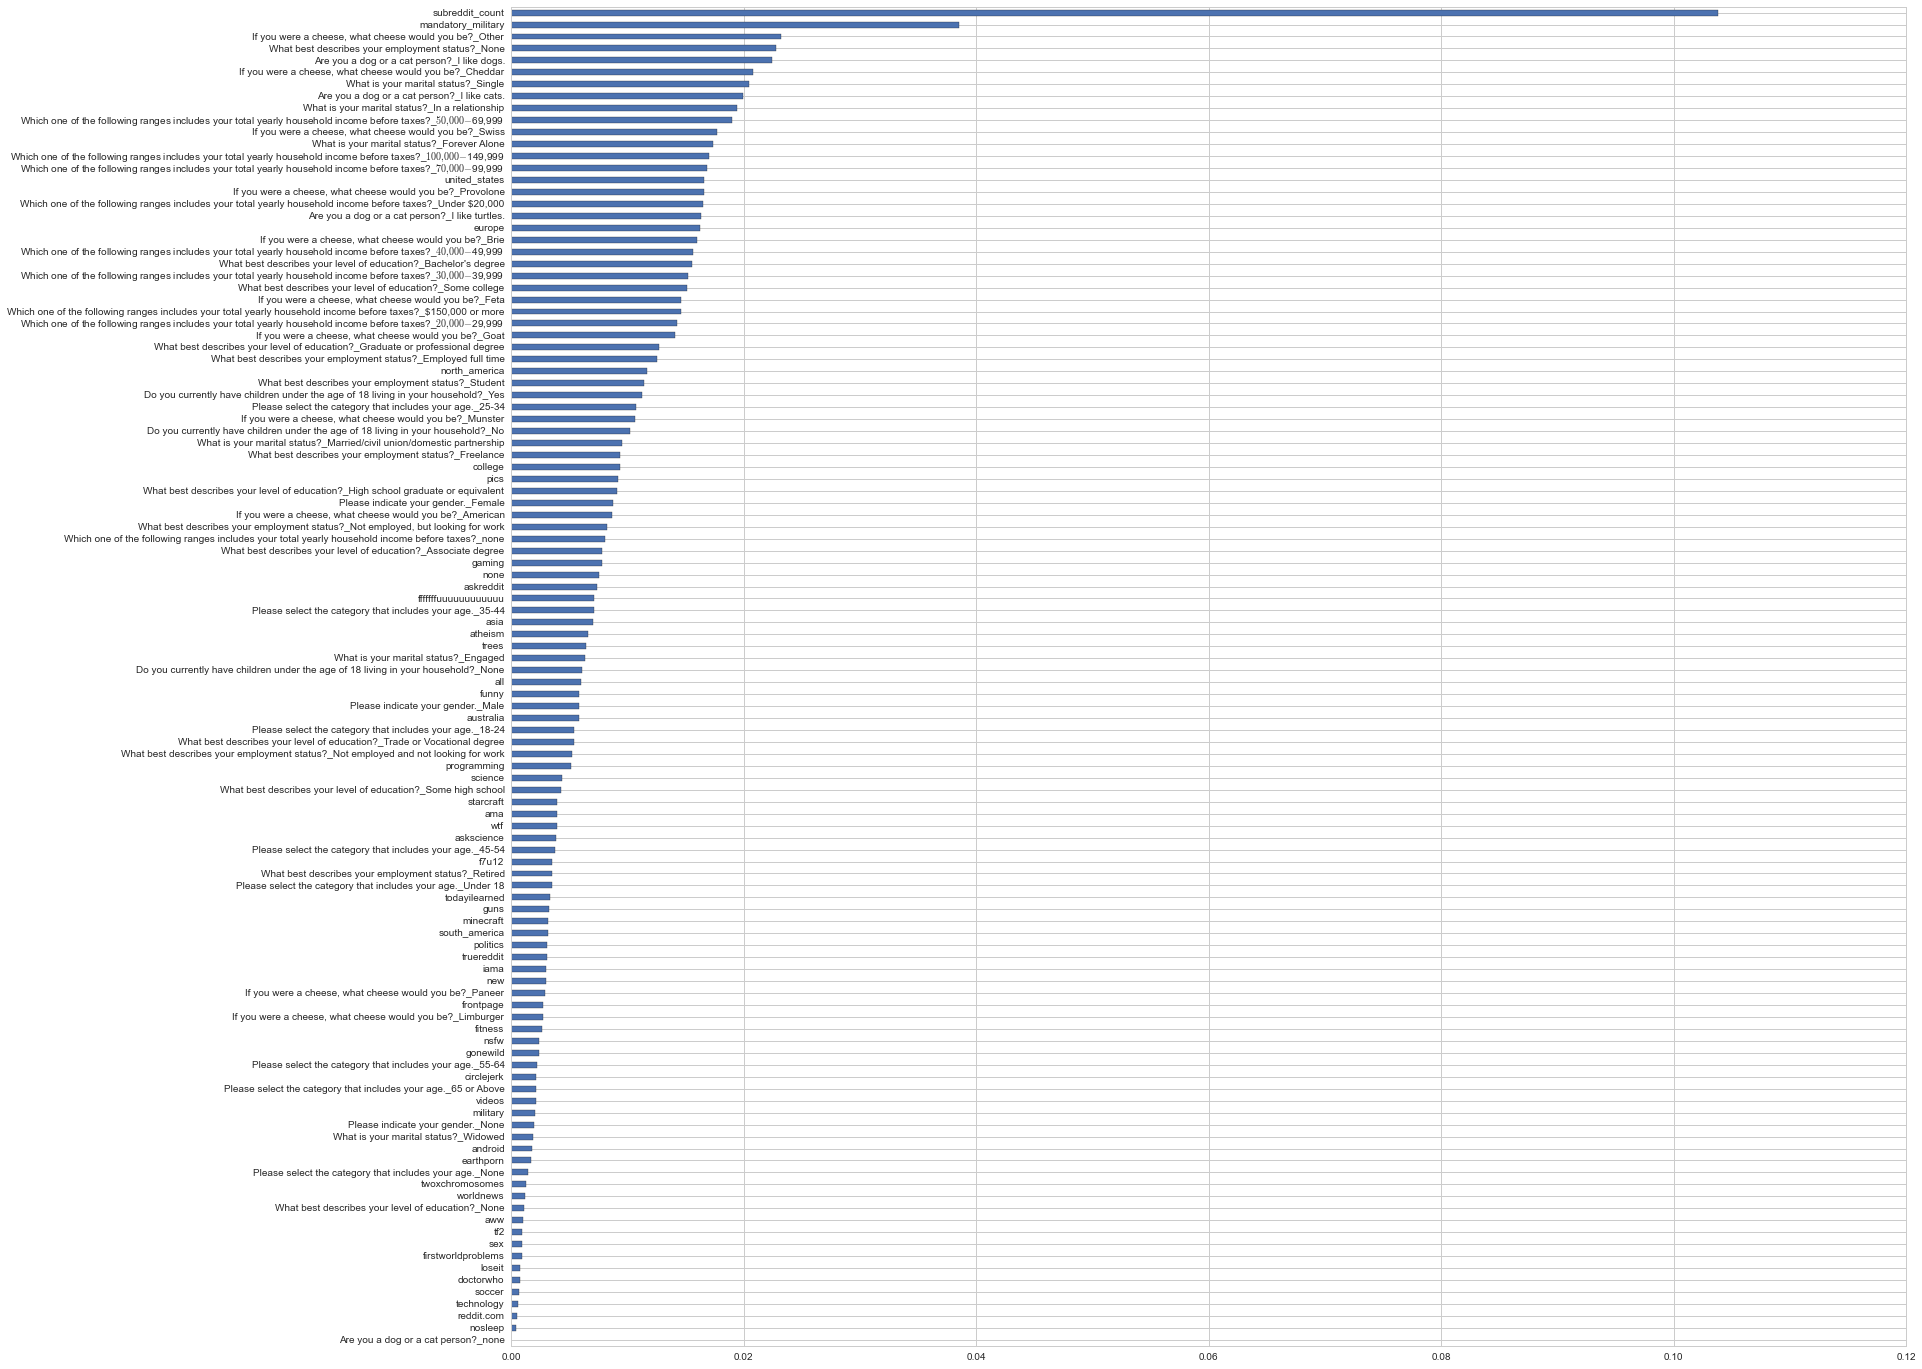

In [107]:
# Simple version that shows all of the variables
feature_importances = pd.Series(model.feature_importances_, index=df.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(25,24));

In [108]:
columns = pd.Series(df.columns)

In [109]:
importances = pd.Series(model.feature_importances_)

In [110]:
feature_importances2 = pd.concat([columns, importances], axis=1)

In [111]:
feature_importances2.columns = ['features', 'importances']

In [112]:
feature_importances2.shape

(112, 2)

In [113]:
feature_importances2.describe()

,importances
count,112.000000
mean,0.008929
std,0.011362
min,0.000003
25%,0.002736
50%,0.006016
75%,0.013031
max,0.103832


In [114]:
feature_importances2[feature_importances2.importances > 0.009]

,features,importances
2,europe,0.016262
3,north_america,0.011698
5,united_states,0.016598
6,mandatory_military,0.038496
7,college,0.009318
12,Please select the category that includes your age._25-34,0.010714
20,What is your marital status?_Forever Alone,0.017363
21,What is your marital status?_In a relationship,0.019410
22,What is your marital status?_Married/civil union/domestic partnership,0.009534
23,What is your marital status?_Single,0.020431


In [118]:
model = RandomForestRegressor(n_estimators=5000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(df, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=5000, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [121]:
print "C-stat: ", round(roc_auc_score(y, model.oob_prediction_), 2)

C-stat:  0.72


In [ ]:
model2 = RandomForestRegressor(n_estimators=7000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model2.fit(df, y)

In [ ]:
print "C-stat: ", roc_auc_score(y, model2.oob_prediction_)